In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [24]:
data = pd.read_csv('persons_pics_train.csv')
len(data['label'].unique())

12

In [25]:
n = data['label'].value_counts()['Hugo Chavez']
sm = data['label'].value_counts().sum()
n/sm

0.04524886877828054

In [26]:
mean = data.groupby('label').mean()
person = mean.loc['George W Bush'][0]
person

0.3481790740804878

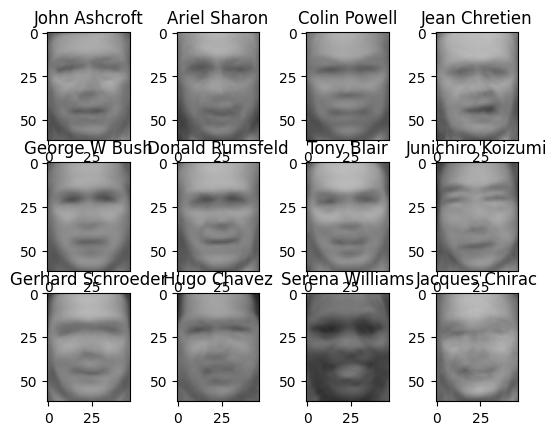

In [27]:
fig, axs = plt.subplots(3, 4)
for k, label in enumerate(data['label'].unique()):
     axs[k//4][k%4].set_title(label)
     img = []
     for i in range(62):
         img.append([])
         for j in range(47):
             img[i].append(mean.loc[label][i*47+j])

     axs[k//4][k%4].imshow(img, cmap='gray', vmin=0, vmax=1)

plt.show()


In [28]:
person2 = mean.loc[['John Ashcroft', 'George W Bush']].prod(axis=0).sum()
a = sqrt(mean.loc[['John Ashcroft', 'John Ashcroft']].prod(axis=0).sum())
b = sqrt(mean.loc[['George W Bush', 'George W Bush']].prod(axis=0).sum())
person2/(a*b)

0.9974649629864025

In [29]:
x = data.drop('label', axis=1)
y = data['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=19, stratify=y)
svc = SVC(kernel='linear', random_state=19)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
f1_score(y_test, y_pred, average='weighted')

0.8027156491284915

In [ ]:
tuned_parameters = [{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000], 'class_weight': [None, 'balanced'], 'random_state':[19]}]

cv = GridSearchCV(SVC(), tuned_parameters, refit=True, verbose=3)
cv.fit(x_train, y_train)
cv.best_params_

In [31]:
y_pred = cv.predict(x_test)
f1_score(y_test, y_pred, average='weighted')

0.8124243633499763

In [32]:
l = 0
r = min(2914, len(x_train)) + 1

while (r - l > 1):
    m = (r + l) // 2
    pca = PCA(n_components=m, svd_solver='full')
    pca.fit(x_train)
    eps = sum(pca.explained_variance_ratio_)
    if (eps >= 0.95): 
      r = m
    else: 
      l = m
m

172

In [ ]:
pca = PCA(n_components=m, svd_solver='full')
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
cv = GridSearchCV(SVC(), tuned_parameters, refit=True, verbose=3)
cv.fit(x_train, y_train)
cv.best_params_

In [34]:
y_pred = cv.predict(x_test)
f1_score(y_test, y_pred, average='weighted')

0.8074583482594873